<a href="https://colab.research.google.com/github/Liz3tha/DRSP-RAINFALL-PROJECT/blob/main/DSRP_PREDICT_RAIN_IN_AUSTRALIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question
Which weather features (columns) combined are most predictive of whether it rains the next day in Australia (across the different regions, no matter the time of year)

# Info on rows

Date: The date of the observation.

Location: The weather station of the observation.

MinTemp: Minimum temperature on the day of the observation.

MaxTemp: Maximum temperature on the day of the observation.

Rainfall: Recorded rainfall, in mm, on the day of the observation.

Evaporation: The observed (class A) pan evaporation in the 24 hours to 9am that day.

Sunshine: Number of hours of bright sunshine observed that day.

WindGustDir: Direction of the strongest wind gust observed in the 24 hours to midnight that day.

WindGustSpeed: Speed, in km/h, of the strongest wind gust observed in the 24 hours to midnight of that day.

WindDir9am: Observed wind direction at 9am.

WindDir3pm: Observed wind direction at 3pm.

WindSpeed9am: Wind speed, in km/h, averaged over 10 minutes prior to 9am.

WindSpeed3pm: Wind speed, in km/h, averaged over 10 minutes prior to 3pm.

Humidity9am: Percent humidity at 9am.

Humidity3pm: Percent humidity at 3pm.

Pressure9am: Atmospheric pressure, in millibars, at 9am.

Pressure3pm: Atmospheric pressure, in millibars, at 3pm.

Cloud9am: Fraction of sky covered by clouds at 9am, measured in “oktas” (1 okta = ⅛ cloud cover; 4 oktas = 4/8 = ½ cloud cover, etc).

Cloud3pm: Fraction of sky covered by clouds at 3pm, measured in oktas.

Temp9am: Temperature, in degrees Celsius, at 9am.

Temp3pm: Temperature, in degrees Celsius, at 3pm.

RainToday: Either ‘Yes’ or ‘No’ for whether or not rain was observed on the day of the observation.

RainTomorrow: Either ‘Yes’ or ‘No’ for whether or not rain was observed on the next day after the row’s observation.


# Importing the data and basic functions


In [30]:
!pip install fix_yahoo_finance
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import numpy as np
import fix_yahoo_finance as fyf

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv', encoding='latin-1')

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  flo

In [31]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [32]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data cleaning (basic)

In [33]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [34]:
# encoding RainToday
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
# encoding Raintomorrow
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
# Dropping data from before 2013
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2014-01-01']


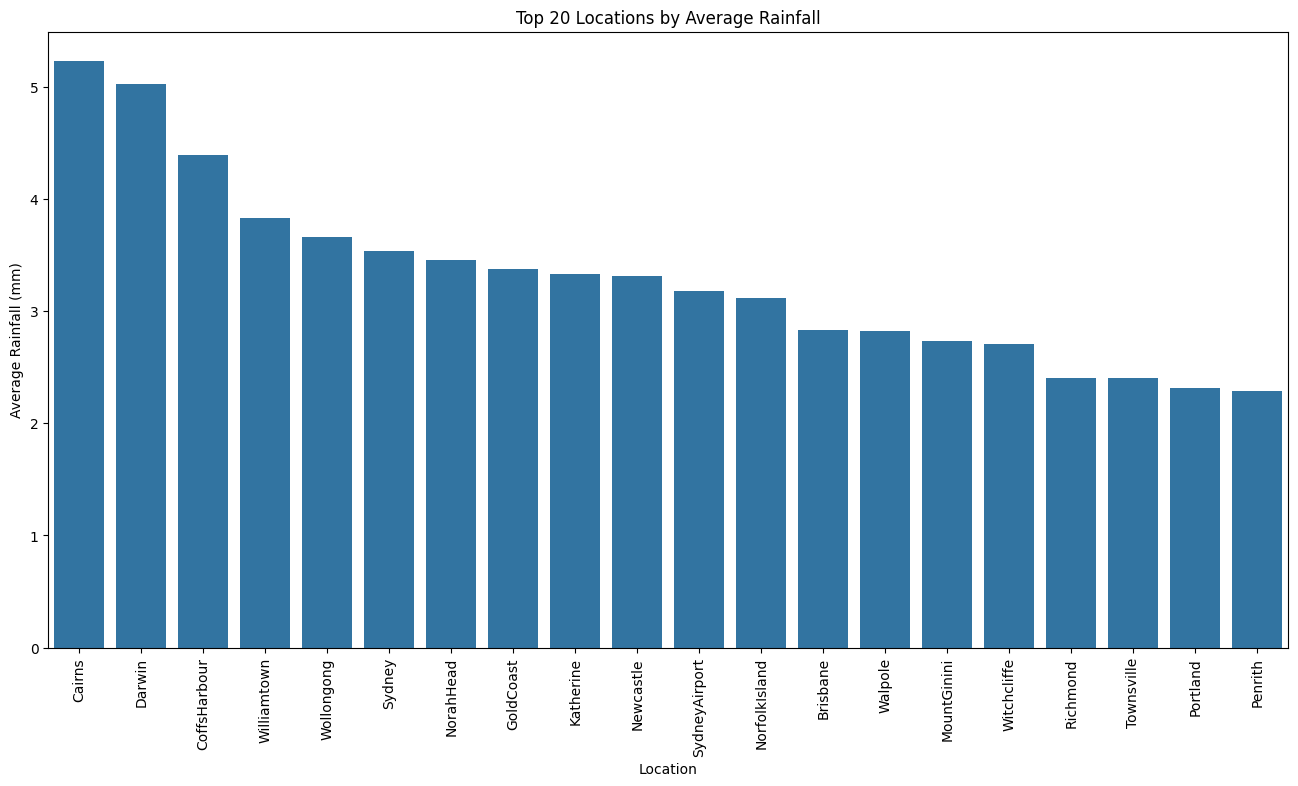

In [35]:
plt.figure(figsize=(16,8))
avg_rain = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)[:20]
sns.barplot(x=avg_rain.index, y=avg_rain.values)
plt.title("Top 20 Locations by Average Rainfall")
plt.xticks(rotation=90)
plt.ylabel("Average Rainfall (mm)")
plt.show()

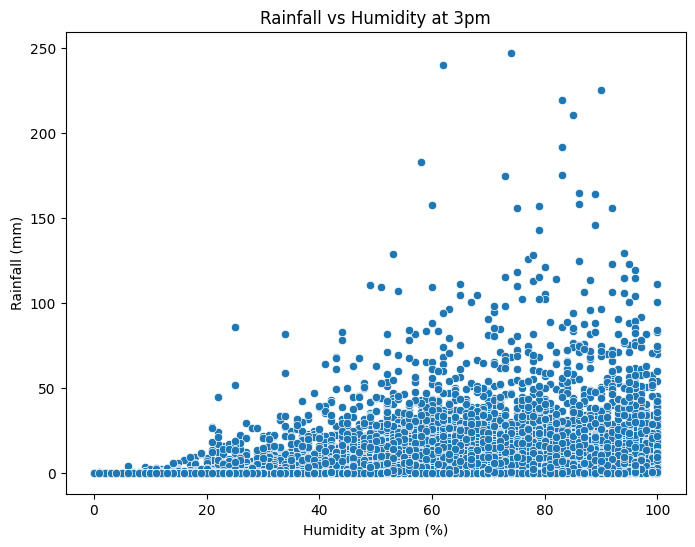

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Humidity3pm', y='Rainfall', data=df)
plt.title("Rainfall vs Humidity at 3pm")
plt.xlabel("Humidity at 3pm (%)")
plt.ylabel("Rainfall (mm)")
plt.show()

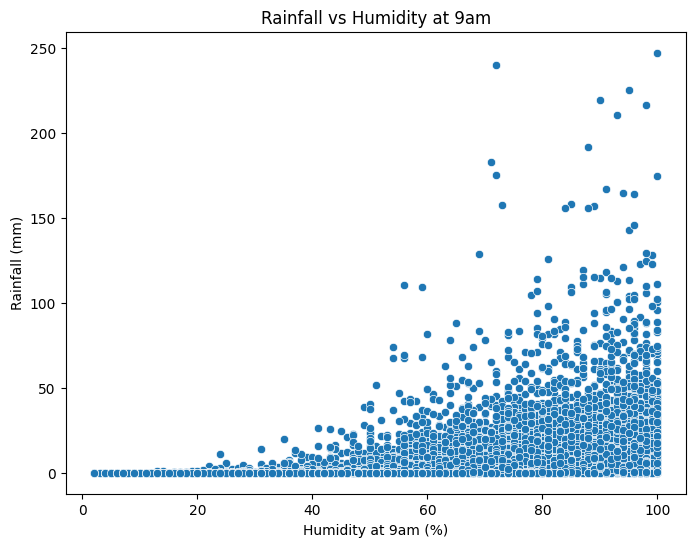

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Humidity9am', y='Rainfall', data=df)
plt.title("Rainfall vs Humidity at 9am")
plt.xlabel("Humidity at 9am (%)")
plt.ylabel("Rainfall (mm)")
plt.show()

In [38]:
df = df.drop_duplicates()
#print(df.isnull().sum())


# Drop rows or fill in missing values (filled with median)
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
#Wind gust direction,  has null values but they are strings
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())


df.isnull().sum()

df.info()






<class 'pandas.core.frame.DataFrame'>
Index: 62327 entries, 1768 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           62327 non-null  datetime64[ns]
 1   Location       62327 non-null  object        
 2   MinTemp        62327 non-null  float64       
 3   MaxTemp        62327 non-null  float64       
 4   Rainfall       62327 non-null  float64       
 5   Evaporation    62327 non-null  float64       
 6   Sunshine       62327 non-null  float64       
 7   WindGustDir    58475 non-null  object        
 8   WindGustSpeed  62327 non-null  float64       
 9   WindDir9am     58031 non-null  object        
 10  WindDir3pm     59987 non-null  object        
 11  WindSpeed9am   62327 non-null  float64       
 12  WindSpeed3pm   62327 non-null  float64       
 13  Humidity9am    62327 non-null  float64       
 14  Humidity3pm    62327 non-null  float64       
 15  Pressure9am    62327

In [39]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1768,2014-01-01,Albury,12.0,27.4,0.0,5.2,8.6,WNW,43.0,SSE,...,56.0,38.0,1011.1,1008.6,6.0,1.0,20.3,25.9,0.0,0.0
1769,2014-01-02,Albury,16.7,27.7,0.0,5.2,8.6,W,31.0,WNW,...,61.0,22.0,1006.1,1005.8,1.0,1.0,22.3,26.4,0.0,0.0
1770,2014-01-03,Albury,18.9,30.6,0.2,5.2,8.6,WSW,44.0,ENE,...,40.0,32.0,1003.1,999.1,8.0,8.0,22.3,27.5,0.0,0.0
1771,2014-01-04,Albury,13.1,25.6,0.0,5.2,8.6,W,46.0,WSW,...,46.0,28.0,1006.8,1005.7,6.0,4.0,16.8,24.2,0.0,0.0
1772,2014-01-05,Albury,8.4,29.4,0.0,5.2,8.6,WNW,65.0,SE,...,50.0,24.0,1009.4,1004.5,6.0,1.0,18.7,28.9,0.0,0.0


In [40]:
corr= df.select_dtypes('number').corr()


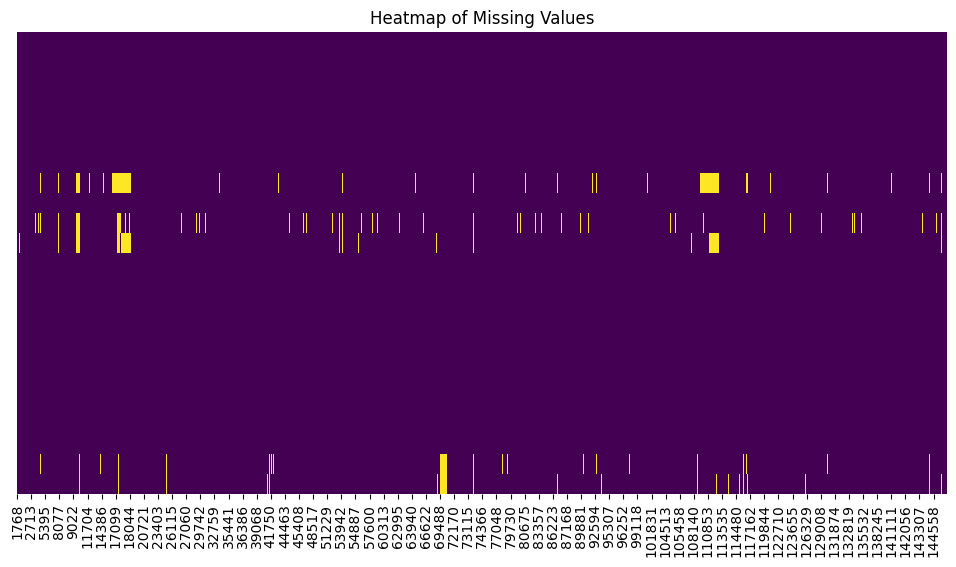

In [41]:
#Heatmap of missing values (Seaborn)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull().T, cbar=False, cmap='viridis', yticklabels=False)
plt.title ("Heatmap of Missing Values")
plt.show()

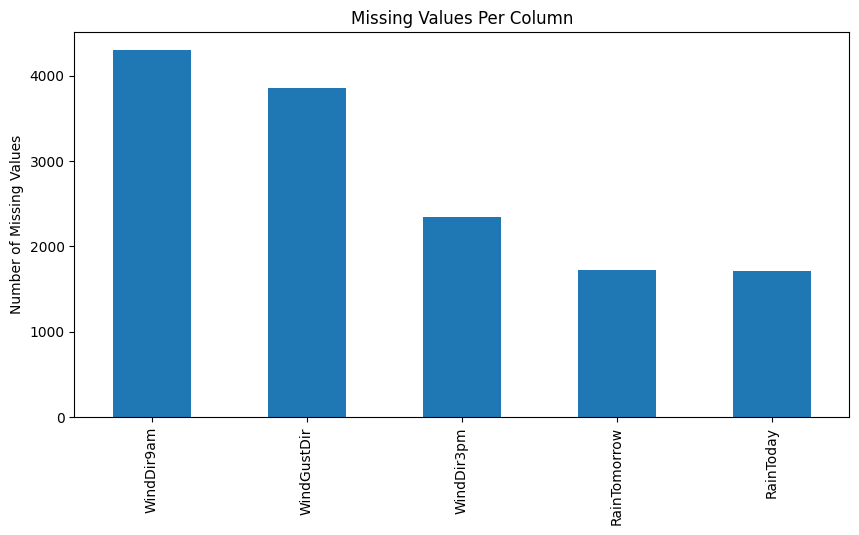

RainToday       0
RainTomorrow    0
dtype: int64


In [54]:
#Bar plot of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

if not missing_counts.empty:
    plt.figure(figsize=(10,5))
    missing_counts.sort_values(ascending=False).plot(kind='bar')
    plt.ylabel("Number of Missing Values")
    plt.title("Missing Values Per Column")
    plt.show()
else:
    print("No missing values found in the dataframe.")


# Drop rows with NaN in RainToday or RainTomorrow
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Optional: reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Check to confirm it's clean
print(df[['RainToday', 'RainTomorrow']].isnull().sum())

In [43]:
# Linear model
# linear_model = LinearRegression ()
# linear_model.fit(days, values)
# # Polynomial model
# (degree 2)
# poly_model =
# make_pipeline(Polynomi alFeatures(degree=2),
# LinearRegression))
# poly_model.fit (days, values)
#THIS IS FOR LATER!

In [44]:
corr.style.background_gradient(cmap= 'coolwarm')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.737780,0.093890,0.303910,0.036224,0.173905,0.170043,0.172064,-0.248873,-0.023129,-0.454464,-0.467175,-0.043965,-0.035719,0.904220,0.698808,0.056457,0.084189
MaxTemp,0.737780,1.000000,-0.081034,0.377448,0.278525,0.081100,0.025378,0.054568,-0.516337,-0.519565,-0.346202,-0.436773,-0.244040,-0.222442,0.885139,0.962959,-0.224745,-0.146448
Rainfall,0.093890,-0.081034,1.000000,-0.027577,-0.140462,0.127697,0.081045,0.059579,0.217894,0.241666,-0.154545,-0.115569,0.134589,0.125116,0.001882,-0.086471,0.508359,0.222492
Evaporation,0.303910,0.377448,-0.027577,1.000000,0.245917,0.132884,0.136655,0.092183,-0.322748,-0.249200,-0.195095,-0.213368,-0.169413,-0.146110,0.358208,0.362584,-0.112063,-0.077145
Sunshine,0.036224,0.278525,-0.140462,0.245917,1.000000,-0.028022,-0.008490,0.027659,-0.273195,-0.357186,0.018961,-0.027342,-0.405737,-0.461827,0.171527,0.289943,-0.200033,-0.271738
WindGustSpeed,0.173905,0.081100,0.127697,0.132884,-0.028022,1.000000,0.565669,0.656697,-0.198217,-0.033132,-0.418601,-0.376493,0.022781,0.055150,0.148224,0.046890,0.148068,0.224111
WindSpeed9am,0.170043,0.025378,0.081045,0.136655,-0.008490,0.565669,1.000000,0.493751,-0.259105,-0.041145,-0.199861,-0.150762,-0.021369,0.015740,0.126847,0.019352,0.091402,0.076376
WindSpeed3pm,0.172064,0.054568,0.059579,0.092183,0.027659,0.656697,0.493751,1.000000,-0.127642,0.021020,-0.269167,-0.228089,0.003447,-0.002766,0.161149,0.036903,0.076236,0.083184
Humidity9am,-0.248873,-0.516337,0.217894,-0.322748,-0.273195,-0.198217,-0.259105,-0.127642,1.000000,0.666559,0.141100,0.186386,0.325261,0.259080,-0.480653,-0.510135,0.349559,0.248166
Humidity3pm,-0.023129,-0.519565,0.241666,-0.249200,-0.357186,-0.033132,-0.041145,0.021020,0.666559,1.000000,-0.005144,0.069145,0.330759,0.372241,-0.241543,-0.576332,0.366501,0.423511


In [45]:
df.shape

(62327, 23)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62327 entries, 1768 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           62327 non-null  datetime64[ns]
 1   Location       62327 non-null  object        
 2   MinTemp        62327 non-null  float64       
 3   MaxTemp        62327 non-null  float64       
 4   Rainfall       62327 non-null  float64       
 5   Evaporation    62327 non-null  float64       
 6   Sunshine       62327 non-null  float64       
 7   WindGustDir    58475 non-null  object        
 8   WindGustSpeed  62327 non-null  float64       
 9   WindDir9am     58031 non-null  object        
 10  WindDir3pm     59987 non-null  object        
 11  WindSpeed9am   62327 non-null  float64       
 12  WindSpeed3pm   62327 non-null  float64       
 13  Humidity9am    62327 non-null  float64       
 14  Humidity3pm    62327 non-null  float64       
 15  Pressure9am    62327

In [47]:

columns_to_drop = ['Date', 'Location', 'WindGustDir', 'WindDir3pm', 'WindDir9am']

# New df js with none strings
new_df = df.drop(columns=columns_to_drop)
print(new_df.head())



      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
1768     12.0     27.4       0.0          5.2       8.6           43.0   
1769     16.7     27.7       0.0          5.2       8.6           31.0   
1770     18.9     30.6       0.2          5.2       8.6           44.0   
1771     13.1     25.6       0.0          5.2       8.6           46.0   
1772      8.4     29.4       0.0          5.2       8.6           65.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
1768          11.0          20.0         56.0         38.0       1011.1   
1769           6.0          20.0         61.0         22.0       1006.1   
1770           6.0          15.0         40.0         32.0       1003.1   
1771          24.0          19.0         46.0         28.0       1006.8   
1772           6.0          30.0         50.0         24.0       1009.4   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
1768       1008.6       6.0       

array([[<Axes: xlabel='Sunshine', ylabel='Sunshine'>,
        <Axes: xlabel='Cloud3pm', ylabel='Sunshine'>,
        <Axes: xlabel='Humidity3pm', ylabel='Sunshine'>,
        <Axes: xlabel='Pressure9am', ylabel='Sunshine'>,
        <Axes: xlabel='MinTemp', ylabel='Sunshine'>,
        <Axes: xlabel='MaxTemp', ylabel='Sunshine'>,
        <Axes: xlabel='RainToday', ylabel='Sunshine'>,
        <Axes: xlabel='RainTomorrow', ylabel='Sunshine'>],
       [<Axes: xlabel='Sunshine', ylabel='Cloud3pm'>,
        <Axes: xlabel='Cloud3pm', ylabel='Cloud3pm'>,
        <Axes: xlabel='Humidity3pm', ylabel='Cloud3pm'>,
        <Axes: xlabel='Pressure9am', ylabel='Cloud3pm'>,
        <Axes: xlabel='MinTemp', ylabel='Cloud3pm'>,
        <Axes: xlabel='MaxTemp', ylabel='Cloud3pm'>,
        <Axes: xlabel='RainToday', ylabel='Cloud3pm'>,
        <Axes: xlabel='RainTomorrow', ylabel='Cloud3pm'>],
       [<Axes: xlabel='Sunshine', ylabel='Humidity3pm'>,
        <Axes: xlabel='Cloud3pm', ylabel='Humidity3pm'>,
  

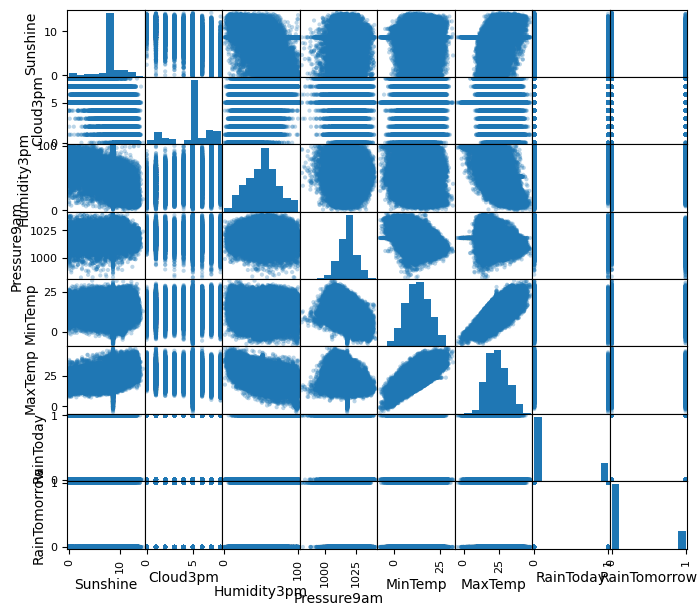

In [48]:
columns_to_drop = ['Date', 'Location', 'WindGustDir', 'WindDir3pm', 'WindDir9am']
new_df = df.drop(columns=columns_to_drop)

from pandas.plotting import scatter_matrix
#below is the first attempt at graphing, very messy
#scatter_matrix(new_df, figsize= (16,12),alpha=0.3)

selectedC = ['Sunshine', 'Cloud3pm', 'Humidity3pm','Pressure9am', 'MinTemp', 'MaxTemp', 'RainToday', 'RainTomorrow']

#New dataframe with variables that interest me
focused_df = new_df[selectedC]

# GRAPHIN NEW PLOTS
from pandas.plotting import scatter_matrix
scatter_matrix(focused_df, figsize=(8, 7), alpha=0.3)

In [49]:
# from sklearn import model_selection

# # Drop rows with missing values in the target variable
# focused_df.dropna(subset=['RainTomorrow'], inplace=True)

# # Define features (X) and target (y)
# features = focused_df.drop('RainTomorrow', axis=1)
# label = focused_df['RainTomorrow']

df.info()
# X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 62327 entries, 1768 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           62327 non-null  datetime64[ns]
 1   Location       62327 non-null  object        
 2   MinTemp        62327 non-null  float64       
 3   MaxTemp        62327 non-null  float64       
 4   Rainfall       62327 non-null  float64       
 5   Evaporation    62327 non-null  float64       
 6   Sunshine       62327 non-null  float64       
 7   WindGustDir    58475 non-null  object        
 8   WindGustSpeed  62327 non-null  float64       
 9   WindDir9am     58031 non-null  object        
 10  WindDir3pm     59987 non-null  object        
 11  WindSpeed9am   62327 non-null  float64       
 12  WindSpeed3pm   62327 non-null  float64       
 13  Humidity9am    62327 non-null  float64       
 14  Humidity3pm    62327 non-null  float64       
 15  Pressure9am    62327

In [55]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['Temp3pm'], df['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,-3.0697,0.0,-3.2041,-2.9353,True


In [56]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['Temp9am'], df['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,-0.3494,0.0,-0.4784,-0.2204,True


In [61]:
columns_to_drop = ['Date', 'Location', 'WindGustDir', 'WindDir3pm', 'WindDir9am']
newishdf = df.drop(columns=columns_to_drop)

#from pandas.plotting import scatter_matrix
#below is the first attempt at graphing, very messy
#scatter_matrix(new_df, figsize= (16,12),alpha=0.3)

selectedC = ['Sunshine', 'Cloud3pm', 'Humidity3pm','Pressure9am', 'MinTemp', 'MaxTemp', 'RainToday', 'RainTomorrow', 'Temp3pm','Temp9am', 'WindSpeed3pm','WindSpeed9am','Rainfall', 'Evaporation']

#New dataframe with variables that interest me
dfforsplitting = newishdf[selectedC]

newishdf.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59980 entries, 0 to 59979
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        59980 non-null  float64
 1   MaxTemp        59980 non-null  float64
 2   Rainfall       59980 non-null  float64
 3   Evaporation    59980 non-null  float64
 4   Sunshine       59980 non-null  float64
 5   WindGustSpeed  59980 non-null  float64
 6   WindSpeed9am   59980 non-null  float64
 7   WindSpeed3pm   59980 non-null  float64
 8   Humidity9am    59980 non-null  float64
 9   Humidity3pm    59980 non-null  float64
 10  Pressure9am    59980 non-null  float64
 11  Pressure3pm    59980 non-null  float64
 12  Cloud9am       59980 non-null  float64
 13  Cloud3pm       59980 non-null  float64
 14  Temp9am        59980 non-null  float64
 15  Temp3pm        59980 non-null  float64
 16  RainToday      59980 non-null  float64
 17  RainTomorrow   59980 non-null  float64
dtypes: flo